In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import KFold, cross_val_score
import joblib

In [2]:
cwd       = os.getcwd()
file_path = r"Data\dataset_cleaned.csv"

dataset   = os.path.join(cwd,file_path)

df_original = pd.read_csv(dataset, parse_dates=['TIME'])

In [3]:
df = df_original.copy()
df.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,1,2023-06-01 00:00:03,2023-05-31 23:59:30,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.26250
1,2,2023-06-01 00:00:03,2023-05-31 23:59:14,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814
2,3,2023-06-01 00:00:03,2023-05-31 23:58:39,BOLTON STREET,20,14,6,OPEN,Bolton Street,53.3512,-6.26986
3,4,2023-06-01 00:00:03,2023-05-31 23:50:47,GREEK STREET,20,6,14,OPEN,Greek Street,53.3469,-6.27298
4,5,2023-06-01 00:00:03,2023-05-31 23:56:14,CHARLEMONT PLACE,40,6,34,OPEN,Charlemont Street,53.3307,-6.26018


In [4]:
lat, lon = df['LATITUDE'], df['LONGITUDE']

lat_rad = lat * np.pi/180
lon_rad = lon * np.pi/180

lat_sin = np.sin(lat_rad)
lat_cos = np.cos(lat_rad)

lon_sin = np.sin(lon_rad)
lon_cos = np.cos(lon_rad)

df[["LAT_SIN", "LAT_COS", "LON_SIN", "LON_COS"]] = pd.DataFrame({"LAT_SIN":lat_sin, 
                                                                "LAT_COS":lat_cos, 
                                                                "LON_SIN":lon_sin, 
                                                                "LON_COS":lon_cos})
df.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,LAT_SIN,LAT_COS,LON_SIN,LON_COS
0,1,2023-06-01 00:00:03,2023-05-31 23:59:30,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.26250,0.802202,0.597053,-0.109084,0.994033
1,2,2023-06-01 00:00:03,2023-05-31 23:59:14,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814,0.802368,0.596830,-0.109182,0.994022
2,3,2023-06-01 00:00:03,2023-05-31 23:58:39,BOLTON STREET,20,14,6,OPEN,Bolton Street,53.3512,-6.26986,0.802309,0.596908,-0.109211,0.994019
3,4,2023-06-01 00:00:03,2023-05-31 23:50:47,GREEK STREET,20,6,14,OPEN,Greek Street,53.3469,-6.27298,0.802265,0.596969,-0.109266,0.994013
4,5,2023-06-01 00:00:03,2023-05-31 23:56:14,CHARLEMONT PLACE,40,6,34,OPEN,Charlemont Street,53.3307,-6.26018,0.802096,0.597195,-0.109043,0.994037


In [5]:
le = LabelEncoder()

df['STATUS_ENCODED'] = le.fit_transform(df['STATUS'])
df.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,LAT_SIN,LAT_COS,LON_SIN,LON_COS,STATUS_ENCODED
0,1,2023-06-01 00:00:03,2023-05-31 23:59:30,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.26250,0.802202,0.597053,-0.109084,0.994033,0
1,2,2023-06-01 00:00:03,2023-05-31 23:59:14,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814,0.802368,0.596830,-0.109182,0.994022,0
2,3,2023-06-01 00:00:03,2023-05-31 23:58:39,BOLTON STREET,20,14,6,OPEN,Bolton Street,53.3512,-6.26986,0.802309,0.596908,-0.109211,0.994019,0
3,4,2023-06-01 00:00:03,2023-05-31 23:50:47,GREEK STREET,20,6,14,OPEN,Greek Street,53.3469,-6.27298,0.802265,0.596969,-0.109266,0.994013,0
4,5,2023-06-01 00:00:03,2023-05-31 23:56:14,CHARLEMONT PLACE,40,6,34,OPEN,Charlemont Street,53.3307,-6.26018,0.802096,0.597195,-0.109043,0.994037,0


In [6]:
columns_to_drop = ['STATION ID', 'NAME','LAST UPDATED', 'ADDRESS',"LONGITUDE", "LATITUDE",'STATUS']
df.drop(columns=columns_to_drop, inplace=True, axis=1)
df.head()

,TIME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,LAT_SIN,LAT_COS,LON_SIN,LON_COS,STATUS_ENCODED
0,2023-06-01 00:00:03,31,31,0,0.802202,0.597053,-0.109084,0.994033,0
1,2023-06-01 00:00:03,20,10,10,0.802368,0.596830,-0.109182,0.994022,0
2,2023-06-01 00:00:03,20,14,6,0.802309,0.596908,-0.109211,0.994019,0
3,2023-06-01 00:00:03,20,6,14,0.802265,0.596969,-0.109266,0.994013,0
4,2023-06-01 00:00:03,40,6,34,0.802096,0.597195,-0.109043,0.994037,0


In [7]:
df['HOUR'] = df['TIME'].dt.hour
df['MINUTES'] = df['TIME'].dt.minute
df['MONTH'] = df['TIME'].dt.month
df['DAY_OF_WEEK'] = df['TIME'].dt.day_of_week
df['IS_WEEKEND'] = (df['DAY_OF_WEEK'] >=5).astype(int)

df['HOUR_SIN'] = np.sin(2 * np.pi * df['HOUR'] / 24)
df['HOUR_COS'] = np.cos(2 * np.pi * df['HOUR'] / 24)

df['MIN_SIN'] = np.sin(2 * np.pi * df['MINUTES'] / 60)
df['MIN_COS'] = np.cos(2 * np.pi * df['MINUTES'] / 60)

df['MONTH_SIN'] = np.sin(2 * np.pi * df['MONTH'] / 12)
df['MONTH_COS'] = np.cos(2 * np.pi * df['MONTH'] / 12)

df['DOW_SIN'] = np.sin(2 * np.pi * df['DAY_OF_WEEK'] / 7)
df['DOW_COS'] = np.cos(2 * np.pi * df['DAY_OF_WEEK'] / 7)


df.drop(['TIME','HOUR', 'MINUTES', 'MONTH', 'DAY_OF_WEEK'],axis=1, inplace=True)
df.head()


,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,LAT_SIN,LAT_COS,LON_SIN,LON_COS,STATUS_ENCODED,IS_WEEKEND,HOUR_SIN,HOUR_COS,MIN_SIN,MIN_COS,MONTH_SIN,MONTH_COS,DOW_SIN,DOW_COS
0,31,31,0,0.802202,0.597053,-0.109084,0.994033,0,0,0.0,1.0,0.0,1.0,1.224647e-16,-1.0,0.433884,-0.900969
1,20,10,10,0.802368,0.596830,-0.109182,0.994022,0,0,0.0,1.0,0.0,1.0,1.224647e-16,-1.0,0.433884,-0.900969
2,20,14,6,0.802309,0.596908,-0.109211,0.994019,0,0,0.0,1.0,0.0,1.0,1.224647e-16,-1.0,0.433884,-0.900969
3,20,6,14,0.802265,0.596969,-0.109266,0.994013,0,0,0.0,1.0,0.0,1.0,1.224647e-16,-1.0,0.433884,-0.900969
4,40,6,34,0.802096,0.597195,-0.109043,0.994037,0,0,0.0,1.0,0.0,1.0,1.224647e-16,-1.0,0.433884,-0.900969


In [8]:
scaler = MinMaxScaler()

df[['BIKE_STANDS', 'AVAILABLE_BIKE_STANDS', 'AVAILABLE_BIKES']] = scaler.fit_transform(df[['BIKE_STANDS', 'AVAILABLE_BIKE_STANDS', 'AVAILABLE_BIKES']])


In [9]:
df_preprocessed = df.copy()

In [ ]:
df_preprocessed.to_csv("Data/dataset_preprocessed.csv", index=False)

In [11]:
features = df.drop(["AVAILABLE_BIKES", "AVAILABLE_BIKE_STANDS"], axis=1)
labels = df["AVAILABLE_BIKES"]

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [12]:
model_1 = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

start = time.time()

model_1.fit(x_train, y_train)

y_pred = model_1.predict(x_test)

mae_1 = mean_absolute_error(y_test, y_pred)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_1 = r2_score(y_test, y_pred)

end = time.time()

print("MAE:", mae_1)
print("RMSE:", rmse_1)
print("R² Score:", r2_1)
print(f"Time Taken: {(end-start):.2f} Seconds")

MAE: 0.11993814756958526
RMSE: 0.15438237167711424
R² Score: 0.611928119818036
Time Taken: 1.23 Seconds


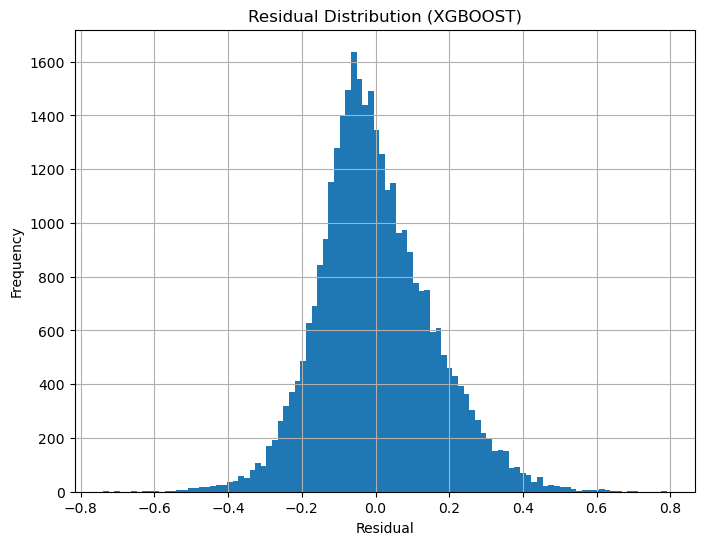

In [13]:
residuals =  y_test -y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=100)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution (XGBOOST)")
plt.grid(True)
plt.show()
plt.close()


MAE: 0.1369246272675909
RMSE: 0.17119903463686317
R² Score: 0.5227791820655022
Time Taken: 45.32 Seconds


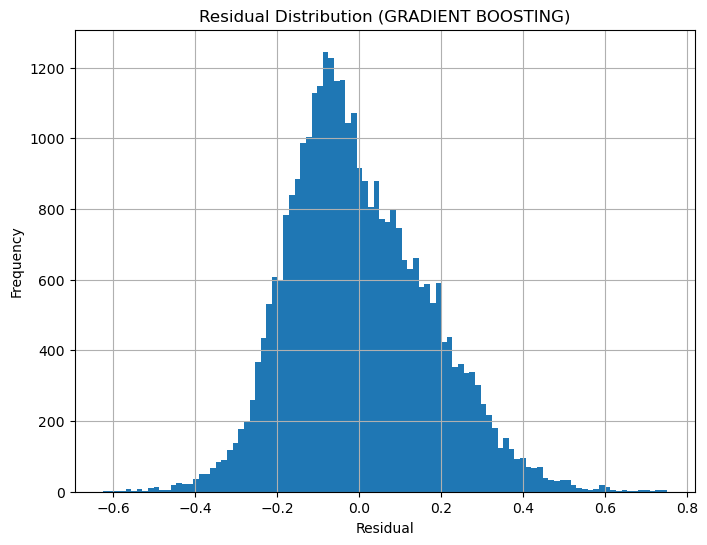

In [14]:
model_2 = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

start = time.time()

model_2.fit(x_train, y_train)

y_pred = model_2.predict(x_test)

mae_2 = mean_absolute_error(y_test, y_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_2 = r2_score(y_test, y_pred)

end = time.time()

print("MAE:", mae_2)
print("RMSE:", rmse_2)
print("R² Score:", r2_2)
print(f"Time Taken: {(end-start):.2f} Seconds")



residuals =  y_test -y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=100)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution (GRADIENT BOOSTING)")
plt.grid(True)
plt.show()
plt.close()

MAE: 0.13519344105989245
RMSE: 0.18017780887845639
R² Score: 0.4714094918118146
Time Taken: 8.47 Seconds


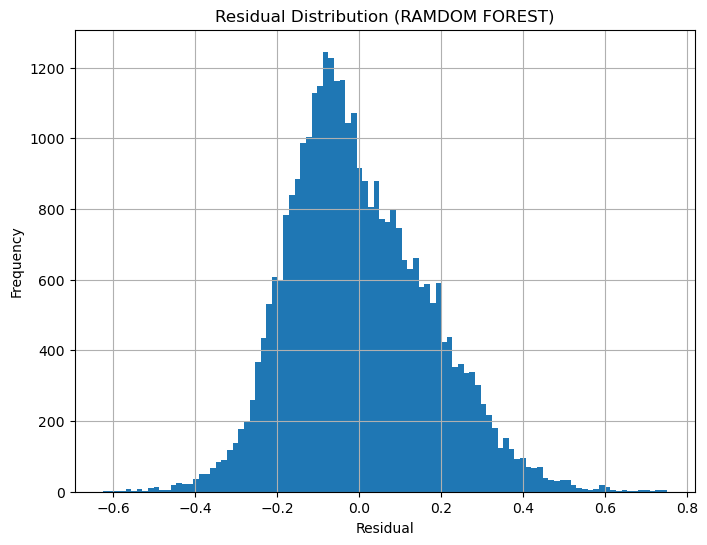

In [15]:
model_3 = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

start = time.time()

model_3.fit(x_train, y_train)

y_pred = model_3.predict(x_test)

mae_3 = mean_absolute_error(y_test, y_pred)
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_3 = r2_score(y_test, y_pred)

end = time.time()

print("MAE:", mae_3)
print("RMSE:", rmse_3)
print("R² Score:", r2_3)
print(f"Time Taken: {(end-start):.2f} Seconds")

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=100)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution (RAMDOM FOREST)")
plt.grid(True)
plt.show()
plt.close()



MAE: 0.200121889830759
RMSE: 0.24201486647273873
R² Score: 0.04632401382704088
Time Taken: 16.82 Seconds


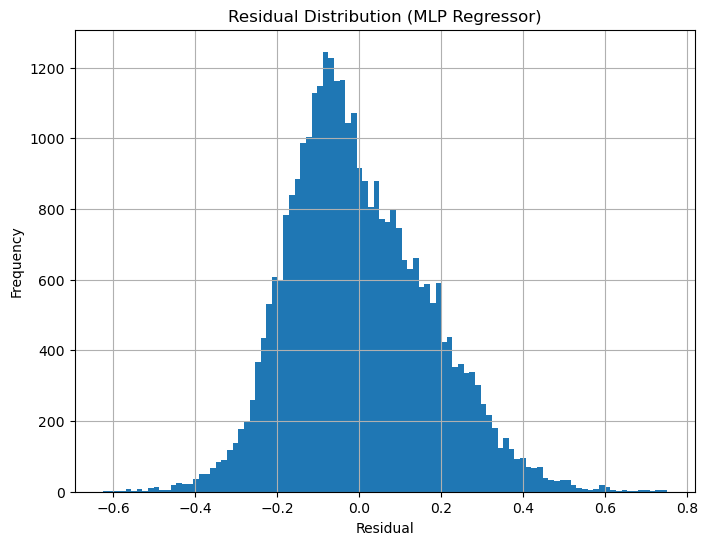

In [16]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    batch_size=1024,           
    max_iter=200,               
    early_stopping=True,       
    validation_fraction=0.1,   
    random_state=42
)

start = time.time()

mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

mae_4 = mean_absolute_error(y_test, y_pred)
rmse_4 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_4 = r2_score(y_test, y_pred)

end = time.time()

print("MAE:", mae_4)
print("RMSE:", rmse_4)
print("R² Score:", r2_4)
print(f"Time Taken: {(end-start):.2f} Seconds")


plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=100)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution (MLP Regressor)")
plt.grid(True)
plt.show()


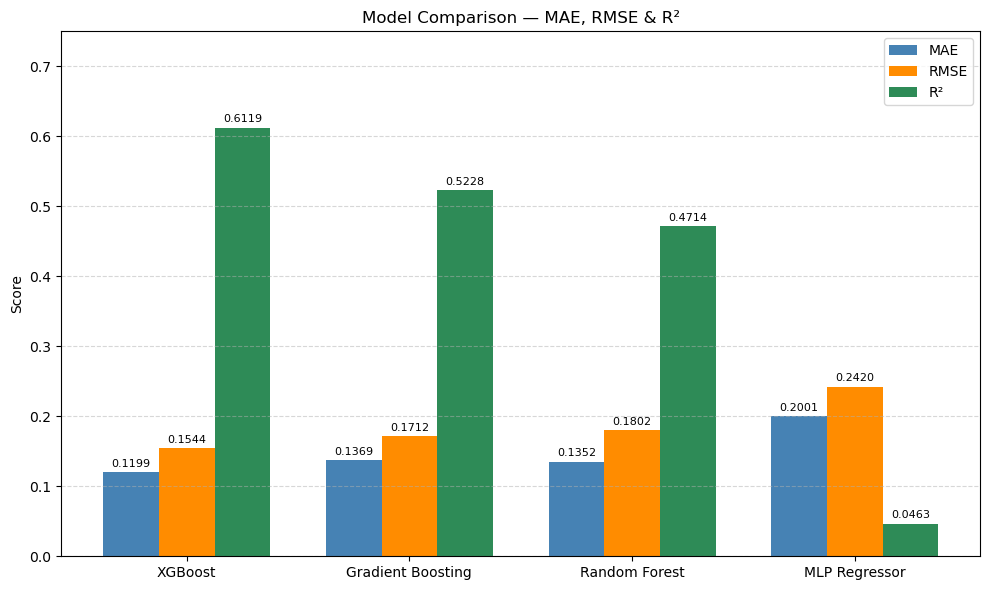

In [17]:
models = ['XGBoost', 'Gradient Boosting', 'Random Forest', 'MLP Regressor']

mae_scores  = [mae_1,  mae_2,  mae_3, mae_4]
rmse_scores = [rmse_1, rmse_2, rmse_3, rmse_4]
r2_scores   = [r2_1,   r2_2,   r2_3, r2_4]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, mae_scores,  width, label='MAE',  color='steelblue')
bars2 = ax.bar(x,         rmse_scores, width, label='RMSE', color='darkorange')
bars3 = ax.bar(x + width, r2_scores,   width, label='R²',   color='seagreen')

for bar in bars1 + bars2 + bars3:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f'{bar.get_height():.4f}',
        ha='center', va='bottom', fontsize=8
    )

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel('Score')
ax.set_title('Model Comparison — MAE, RMSE & R²')
ax.legend()
ax.set_ylim(0, 0.75)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Outputs/Figures/models_comparison.png')
plt.show()

In [18]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

XGBoost_scores = cross_val_score(
    model_1,
    features,
    labels,
    cv=cv,
    scoring='neg_mean_absolute_error'
)

MLP_scores = cross_val_score(
    mlp,
    features,
    labels,
    cv=cv,
    scoring='neg_mean_absolute_error'
)

print(f"Mean CV Score for XG-Boost: {XGBoost_scores.mean()}")
print(f"Mean CV Score for MLP: {MLP_scores.mean()}")

Mean CV Score for XG-Boost: -0.1201265289095507
Mean CV Score for MLP: -0.2017361752235392


In [19]:
joblib.dump(model_1, 'Outputs/Models/XG-Boost Model.joblib')

['Outputs/Models/XG-Boost Model.joblib']